# **Predicting Arrests Following Terry Stops: Analyzing Factors Influencing Police Decision-Making**

## **Introduction**

In the realm of law enforcement, Terry Stops have been a subject of ongoing debate and scrutiny since their inception following the 1968 Supreme Court case Terry v. Ohio. These brief detentions, based on reasonable suspicion rather than probable cause, have become a common policing practice but have also raised concerns about potential biases and the fine line between public safety and individual rights. This project aims to delve into the complex dynamics of Terry Stops by leveraging data analytics and machine learning techniques. Our goal is to develop a predictive model that can determine the likelihood of an arrest following a Terry Stop, based on various factors such as the presence of weapons, time of day, and potentially sensitive demographic information like race and gender.  

By analyzing this data, we seek to uncover patterns and insights that could help law enforcement agencies refine their practices, address potential biases, and strike a balance between effective policing and fair treatment of all individuals. This analysis is particularly timely given the current national discourse on police reform and racial equity in the justice system. Our approach will involve careful consideration of ethical implications, transparent methodology, and a commitment to presenting findings in a way that contributes constructively to the ongoing dialogue about fair and effective law enforcement. Through this project, we aim to provide data-driven insights that can inform policy decisions, enhance police training, and ultimately contribute to building trust between law enforcement and the communities they serve. As we embark on this analysis, we recognize the sensitivity of the subject matter and the potential impact of our findings. Our objective is not to pass judgment but to illuminate patterns and trends that can lead to more informed, equitable, and effective policing practices in the context of Terry Stops.  

## **Business Understanding**

### Problem Statement

Law enforcement agencies are facing scrutiny over their stop-and-frisk practices, particularly regarding potential biases in arrest decisions. There's a need to understand the factors that influence whether an arrest is made following a Terry Stop to ensure fair and effective policing. This project aims to use data analysis and machine learning to shed light on the factors influencing arrest decisions during Terry Stops, potentially uncovering patterns that could help improve police practices and address concerns about bias in law enforcement.

### Objectives

- Develop a machine learning model to predict whether an arrest will be made after a Terry Stop.  
- Identify key factors that contribute to arrest decisions.  
- Analyze if and how demographic factors (race, gender) correlate with arrest outcomes.  
- Provide insights to help law enforcement agencies improve their decision-making processes and address potential biases.  

### Stakeholders

- Law enforcement agencies
- Police officers
- Policy makers
- Community leaders and civil rights organizations
- General public

### Data Sources

Dataset was obtained from Seattle Government which can be accessed using this [link](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/data_preview)  
Terry Stops dataset containing information on:  

- Presence of weapons  
- Time of day of the call  
- Demographic information (race, gender) of subjects and officers  
- Arrest outcomes  

### Ethical Considerations

- Handling sensitive demographic data responsibly  
- Addressing potential biases in the dataset and model  
- Ensuring transparency in methodology and findings  
- Considering the broader societal implications of the analysis  

### Success Criteria 

- Develop a classifier with high accuracy in predicting arrests  
- Provide actionable insights for improving police practices  
- Contribute to the ongoing dialogue about fair policing and potential biases in law enforcement  

### Methodology

1. **Data Collection and Inspection**: Gathering the necessary data from the provided dataset.
2. **Data Cleaning and Preparation**: Cleaning the data to handle missing values, outliers, and incorrect data types.
3. **Exploratory Data Analysis (EDA)**: Analyzing the data to find patterns, relationships, and insights.
4. **Data Preprocessing**: This includes `Feature Selection`, `Target Variable Encoding`, `Time Conversion` and `Categorical Encoding`.
5. **Data Splitting**: Splitting data into Training and Testing sets using the **70/30** ratio.
6. **Model Selection and Training**: Come up with model choice and model training.
7. **Model Evaluation**: Check on Accuracy and Classification Report
8. **Discussion and Next Steps**: Model Performance Analaysis and Future work

## **Data Understanding**

Importing libraries

In [1043]:
# import necessary libraries and functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
from sklearn.metrics import classification_report, confusion_matrix



Loading the Data and viewing the first 5 rows of the Dataset

In [1044]:
# Load the dataset
df = pd.read_csv("./Data/Terry_Stops_20240823.csv")
# Viewing the first 5 rows
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,18 - 25,-1,20170000017766,230380,Offense Report,NaN,6728,1973,M,Two or More Races,...,08:03:00.0000000,ASLT - PERSON SHOT OR SHOT AT,--DRIVE BY SHOOTING - NO INJURIES,911,SOUTH PCT 1ST W - R/S RELIEF,N,Y,South,S,S2
1,-,-1,20190000273690,8755198750,Field Contact,-,7528,1969,M,White,...,06:38:41.0000000,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...","--WEAPON,PERSON WITH - OTHER WEAPON",911,NORTH PCT OPS - CPT,N,Y,North,U,U3
2,36 - 45,7735709716,20200000186847,13469755649,Field Contact,-,6414,1964,M,Asian,...,01:27:52.0000000,OBS - DOWN - CHECK FOR PERSON DOWN,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - NORA (JOHN) - PLATOON 1,N,N,North,N,N2
3,46 - 55,-1,20170000149189,460834,Arrest,NaN,5491,1967,M,Black or African American,...,09:53:00.0000000,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1,N,Y,North,L,L3
4,46 - 55,-1,20160000001969,153868,Field Contact,NaN,6899,1977,M,White,...,21:57:00.0000000,-,-,-,NORTH PCT 3RD W - LINCOLN - PLATOON 1,N,N,-,-,-


#### *Data Inspection*

In [1045]:
# The shape of the dataset
df.shape

(60984, 23)

The dataset contains 60,984 records and 23 columns.Here is a detailed list of the columns in the dataset, along with a brief description of each:

In [1046]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

From the above output, Here is a detailed explanation of each column in our DataFrame

1. `Subject Age Group`: The age range of the subject involved in the Terry Stop (e.g., "18 - 25", "36 - 45").  
2. `Subject ID`: A unique identifier assigned to the subject of the Terry Stop.  
3. `GO / SC Num`: An internal case or record number associated with the incident.  
4. `Terry Stop ID`: A unique identifier for the specific Terry Stop event.  
5. `Stop Resolution`: The outcome or resolution of the Terry Stop (e.g., "Arrest", "Field Contact", "Offense Report").  
6. `Weapon Type`: The type of weapon found, if any, during the stop (e.g., "None", "Firearm", "Knife").  
7. `Officer ID`: A unique identifier assigned to the officer conducting the stop.  
8. `Officer YOB`: The year of birth of the officer involved in the stop.  
9. `Officer Gender`: The gender of the officer (e.g., "M" for Male, "F" for Female).  
10. `Officer Race`: The race or ethnicity of the officer (e.g., "White", "Black or African American", "Asian").  
11. `Subject Perceived Race`: The race or ethnicity of the subject as perceived by the officer (e.g., "White", "Black or African American", "Asian").  
12. `Subject Perceived Gender`: The gender of the subject as perceived by the officer (e.g., "Male", "Female").  
13. `Reported Date`: The date on which the Terry Stop was reported.  
14. `Reported Time`: The time at which the Terry Stop was reported (e.g., "08:03:00.0000000").  
15. `Initial Call Type`: The type of the initial call that led to the Terry Stop (e.g., "ASLT - PERSON SHOT OR SHOT AT").  
16. `Final Call Type`: The final classification of the call after the incident was resolved (e.g., "DRIVE BY SHOOTING - NO INJURIES").  
17. `Call Type`: The nature of the call, usually indicating whether it was a 911 call or another type (e.g., "911").  
18. `Officer Squad`: The squad or unit to which the officer belongs.  
19. `Arrest Flag`: Indicates whether an arrest was made during the stop (Y for Yes, N for No).  
20. `Frisk Flag`: Indicates whether a frisk or search was conducted during the stop (Y for Yes, N for No).  
21. `Precinct`: The police precinct where the Terry Stop occurred.  
22. `Sector`: A smaller geographical area within the precinct.  
23. `Beat`: The specific patrol area or beat within the sector.  

In [1047]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60984 entries, 0 to 60983
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         60984 non-null  object
 1   Subject ID                60984 non-null  int64 
 2   GO / SC Num               60984 non-null  int64 
 3   Terry Stop ID             60984 non-null  int64 
 4   Stop Resolution           60984 non-null  object
 5   Weapon Type               28419 non-null  object
 6   Officer ID                60984 non-null  object
 7   Officer YOB               60984 non-null  int64 
 8   Officer Gender            60984 non-null  object
 9   Officer Race              60984 non-null  object
 10  Subject Perceived Race    60984 non-null  object
 11  Subject Perceived Gender  60984 non-null  object
 12  Reported Date             60984 non-null  object
 13  Reported Time             60984 non-null  object
 14  Initial Call Type     

From the above output, we can notice that majority of the column's DataTypes are `objects`(**19**) whereas only **4** are `integers` 

In [1048]:
df.isna().any()

Subject Age Group           False
Subject ID                  False
GO / SC Num                 False
Terry Stop ID               False
Stop Resolution             False
Weapon Type                  True
Officer ID                  False
Officer YOB                 False
Officer Gender              False
Officer Race                False
Subject Perceived Race      False
Subject Perceived Gender    False
Reported Date               False
Reported Time               False
Initial Call Type           False
Final Call Type             False
Call Type                   False
Officer Squad                True
Arrest Flag                 False
Frisk Flag                  False
Precinct                    False
Sector                      False
Beat                        False
dtype: bool

We can notice from the output that only Weapon Type and Officer Squad have missing values. 

In [1049]:
# Checking for missing values and their percentages
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

               Missing Values  Percentage
Weapon Type             32565   53.399252
Officer Squad             561    0.919913


We identified the columns with missing values and their respective percentages to understand the extent of missing data in our dataset. The results are as follows:  
| Column         | Missing Values |  Percentage    | 
|----------------|----------------|----------------|
| Weapon Type    |   32565        | 53.399252 %    |
| Officer Squad  |   561          | 0.919913 %     |

***Comment*** 

From the Dataset information, `Weapon Type` has 32,565 null values and `Officer Squad` has 561 null values, the rest have no null values.  

Weapon Type: The high percentage of missing data for weapon type is a major concern. It could indicate issues in data collection, reporting, or recording processes. This missing data might introduce significant bias if not handled properly.  

Officer Squad: The low percentage of missing data for officer squad is less problematic. Since we are not going to use it anywhere. Nothing much is going to be done about it.

In [1050]:
#checking for duplicates in our dataset
df.duplicated().sum()

0

There are no dublicates in this Dataset.

#### *Data Statistics*

In [1051]:
# Summary statistics for numerical columns
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.098400e+04,6.098400e+04,6.098400e+04,60984.000000
mean,7.264174e+09,2.018662e+13,1.214806e+10,1984.078398
std,1.268858e+10,8.574292e+10,1.750952e+10,9.471936
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.389360e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.088500e+05,1986.000000
75%,7.752509e+09,2.021000e+13,1.970754e+10,1991.000000
max,5.847921e+10,2.024000e+13,5.849088e+10,2002.000000


We got the summary statistics for numerical columns to understand the distribution and key characteristics of our dataset. below are some of the key observations:  

In this project, our key concern is the `Officer YOB`. From the summary, Majority of officers born between 1900 and 2002, their average YOB is 1984

## **Data Preprocessing**

### Handling Missing Values

Before handling any missing values, it is prudent if we view our dataset to know areas that have missing values. In this case, no data will be dropped at this point, for every bit of it matters in our modeling and we don't want to create biasness in our predictions


In [1052]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,18 - 25,-1,20170000017766,230380,Offense Report,NaN,6728,1973,M,Two or More Races,...,08:03:00.0000000,ASLT - PERSON SHOT OR SHOT AT,--DRIVE BY SHOOTING - NO INJURIES,911,SOUTH PCT 1ST W - R/S RELIEF,N,Y,South,S,S2
1,-,-1,20190000273690,8755198750,Field Contact,-,7528,1969,M,White,...,06:38:41.0000000,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...","--WEAPON,PERSON WITH - OTHER WEAPON",911,NORTH PCT OPS - CPT,N,Y,North,U,U3
2,36 - 45,7735709716,20200000186847,13469755649,Field Contact,-,6414,1964,M,Asian,...,01:27:52.0000000,OBS - DOWN - CHECK FOR PERSON DOWN,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - NORA (JOHN) - PLATOON 1,N,N,North,N,N2
3,46 - 55,-1,20170000149189,460834,Arrest,NaN,5491,1967,M,Black or African American,...,09:53:00.0000000,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1,N,Y,North,L,L3
4,46 - 55,-1,20160000001969,153868,Field Contact,NaN,6899,1977,M,White,...,21:57:00.0000000,-,-,-,NORTH PCT 3RD W - LINCOLN - PLATOON 1,N,N,-,-,-


From the above output, We can still notice there are also other columns with "-" values. We are first going to convert them into NaN and re-check sum of null values in our dataset. This is an indication that the records were Missing or Undefined during the data entries

In [1053]:
# Replace '-' values with NaN
df.replace('-', np.NaN, inplace=True)

# Check if there is any null values in the Dataset
df.isna().sum()

Subject Age Group            2200
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 57114
Officer ID                     24
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race       1816
Subject Perceived Gender      243
Reported Date                   0
Reported Time                   0
Initial Call Type           13473
Final Call Type             13473
Call Type                   13473
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                    478
Precinct                    10619
Sector                      10770
Beat                        10764
dtype: int64

From the above output, it is evident we had so many "-" values which are clear indication that they were either missing or undefined. We are going first check the percentages of values missing and then impute some of the missing values with placeholder "Unknown" to indicate that the values are not known and some with their respective modes

In [1054]:
# Checking for missing values and their percentages
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

                          Missing Values  Percentage
Subject Age Group                   2200    3.607504
Weapon Type                        57114   93.654073
Officer ID                            24    0.039355
Subject Perceived Race              1816    2.977830
Subject Perceived Gender             243    0.398465
Initial Call Type                  13473   22.092680
Final Call Type                    13473   22.092680
Call Type                          13473   22.092680
Officer Squad                        561    0.919913
Frisk Flag                           478    0.783812
Precinct                           10619   17.412764
Sector                             10770   17.660370
Beat                               10764   17.650531


Fom the above ouputs, it is evident the Dataset had lots of "-" values and after changing them to NaN, we can see that:  

- **Subject Age Group** has **2200** Null values which is at **3.6%**
- **Officer ID** has **24** Null values which is at **0.04%**
- **Subject Perceived Race** has **1816** Null values which is at **2.98%**
- **Subject Perceived Gender** has **243** Null values which is at **0.40%**
- **Initial Call Type**, **Final Call Type**, and **Call Type** have **13473** Null values each which are all at **22.09%** each
- **Officer Squad** has **561** Null values which is at **0.92%**
- **Frisk Flag** has **478** Null values which is at **0.78%**
- **Precinct** has **10619** Null values which is at **17.41%**
- **Sector** has **10770** Null values which is at **17.66%**
- **Beat** has **10764** Null values which is at **17.65%**


#### *Imputation of Missing Values*

In [1055]:
# For Initial Call Type, Final Call Type, Call Type: Impute with a placeholder
df["Initial Call Type"].fillna("Unknown", inplace=True)
df['Final Call Type'].fillna('Unknown', inplace=True)
df['Call Type'].fillna('Unknown', inplace=True)

# For Officer Squad: Impute with a placeholder
df['Officer Squad'].fillna('Unknown', inplace=True)

# For Precinct, Sector, Beat: Impute with 'Unknown' since these are categorical
df['Precinct'].fillna('Unknown', inplace=True)
df['Sector'].fillna('Unknown', inplace=True)
df['Beat'].fillna('Unknown', inplace=True)

# For Subject Perceived Race: Impute with mode
df['Subject Perceived Race'].fillna(df['Subject Perceived Race'].mode()[0], inplace=True)

# For Subject Perceived Gender: Impute with mode
df['Subject Perceived Gender'].fillna(df['Subject Perceived Gender'].mode()[0], inplace=True)

# For Officer ID: Impute with a placeholder since it's categorical
df['Officer ID'].fillna('Unknown', inplace=True)

# For Subject Age Group: Impute with mode (most common age group)
df['Subject Age Group'].fillna(df['Subject Age Group'].mode()[0], inplace=True)

# For Frisk Flag: Impute with mode (it’s binary Y/N)
df['Frisk Flag'].fillna(df['Frisk Flag'].mode()[0], inplace=True)

Imputed all the missing values and we are now going to confirm if there is any missing value.

In [1056]:
# Assuming you have a dataset named 'df'
df["Weapon Type"] = df["Weapon Type"].replace({None: 'Unknown', 'None/Not Applicable': 'No Weapon', 'Firearm (unk type)': 'Firearm',
                                                'Firearm Other': 'Firearm', 'Other Firearm': 'Firearm', 
                                                'Club, Blackjack, Brass Knuckles': 'Club/Blackjack/Brass Knuckles'}
                                                )
df["Subject Perceived Gender"] = df["Subject Perceived Gender"].replace({"Unable to Determine": "Unknown"})
df["Subject Perceived Race"] = df["Subject Perceived Race"].replace(
    {'Unknown': 'Others', 'Other': 'Others', 'MULTIPLE SUBJECTS': 'Others'}
)
df["Officer Race"] = df["Officer Race"].replace(
    {'Not Specified': 'Others', 'Unknown': 'Others', 'Two or More Races': 'Multi-Racial'}
)
df["Precinct"] = df["Precinct"].replace(
    {"OOJ": "Unknown", "FK ERROR": "Unknown"}
)

We performed some data cleaning and standardization on key important columns that we will be using in our predictions. 

1. Weapon Type Cleaning:  
- Replaces **None** with **Unknown**
- **None/Not Applicable** becomes **No Weapon**
- Various firearm types (**Firearm (unk type), Firearm Other, Other Firearm**) are consolidated into just **Firearm**
- **Club, Blackjack, Brass Knuckles** is renamed to **Club/Blackjack/Brass Knuckles**

2. Subject Perceived Gender:  
- **Unable to Determine** is changed to **Unknown**

3. Subject Perceived Race:   
- **Unknown, Other**, and **MULTIPLE SUBJECTS** are all grouped into **Others**

4. Officer Race:  
- **Not Specified** and **Unknown** are grouped into **Others**
- **Two or More Races** is renamed to **Multi-Racial**

### Data Transformation

In [1057]:
# Convert 'Reported Date' to datetime and format to 'YYYY-MM-DD' in one line
df['Reported Date'] = pd.to_datetime(df['Reported Date']).dt.date

# Convert 'Reported Time' to datetime, then format it to remove microseconds
df['Reported Time'] = pd.to_datetime(df['Reported Time'], format='%H:%M:%S.%f').dt.strftime('%H:%M:%S')

# Showing the outcome of the transformation
df[["Reported Date", "Reported Time"]].head()

,Reported Date,Reported Time
0,2017-01-15,08:03:00
1,2019-07-26,06:38:41
2,2020-06-13,01:27:52
3,2017-04-29,09:53:00
4,2016-05-10,21:57:00


Handled the Reported Date and Reported Time columns which are Dtypes objects by converting them to a date format.

In [1058]:
# Summary of the Dataset
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)
    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)
    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (60984, 23)
___________________________
Data Types:
Types
object    19
int64      4
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Arrest Flag,object,60984,2,0,N,Y
Beat,object,60984,55,0,99,W3
Call Type,object,60984,7,0,911,Unknown
Final Call Type,object,60984,196,0,"--ALARM-COMM (INC BANK, ATM, SCHOOLS, BSN)","WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)"
Frisk Flag,object,60984,2,0,N,Y
GO / SC Num,int64,60984,48823,0,-1,20240000235045
Initial Call Type,object,60984,180,0,-ASSIGNED DUTY - DETAIL BY SUPERVISOR,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)"
Officer Gender,object,60984,3,0,F,N
Officer ID,object,60984,1383,0,-9,X647
Officer Race,object,60984,8,0,American Indian/Alaska Native,White


In the above summary, we have shown the following for each column in our DataFrame:  
* Data Types    
* Counts  
* Unique Values  
* Null values  
* Min value  
* Max value

## **Exploratory Data Analysis**

### *Age comparison*
In the first comparison, we will understand how old are the people that are being stopped and how many people from each category.

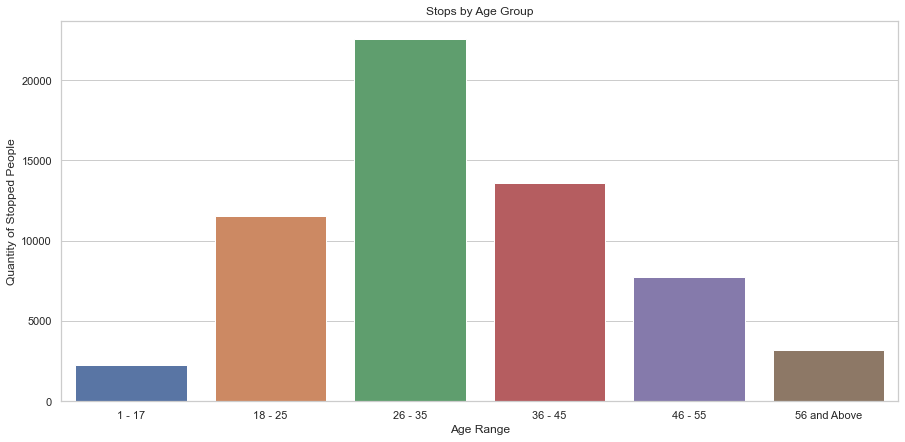

In [1059]:
# Get the value counts for 'Subject Age Group'
age_counts = df['Subject Age Group'].value_counts().sort_index()

# Plotting the bar graph
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

sns.barplot(x=age_counts.index, y=age_counts.values, ax=ax)

ax.set(ylabel='Quantity of Stopped People', 
       xlabel='Age Range', 
       title='Stops by Age Group')

 # Rotate x-axis labels if needed for better readability
plt.show();

Here's a breakdown of the output:  

- 1-17 age group: Approximately 2,500 stops  
- 18-25 age group: About 11,500 stops  
- 26-35 age group: The highest number of stops, around 22,500  
- 36-45 age group: About 13,500 stops  
- 46-55 age group: Approximately 7,500 stops  
- 56 and Above: The lowest number of stops, about 3,000  

Key observations:

* The 26-35 age group experiences the most stops by a significant margin.  
* There's a clear peak in stops for young to middle-aged adults (18-45).  
* Stops decrease sharply for both the youngest (1-17) and oldest (56 and above) age groups.  
* The number of stops generally increases from younger to middle-aged groups, then decreases for older age groups.  

### *Stop Resolution Comparison*

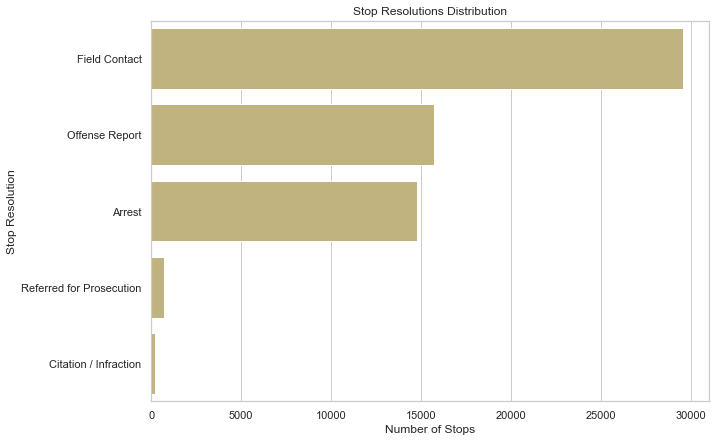

In [1060]:
# Identify unique values 
df["Stop Resolution"].unique()

# Get the value counts for 'Stop Resolution'
resolution_counts = df['Stop Resolution'].value_counts()

# Plotting the horizontal bar graph
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

sns.barplot(x=resolution_counts.values, y=resolution_counts.index, ax=ax, orient='h', color="y")

ax.set(xlabel='Number of Stops', 
       ylabel='Stop Resolution', 
       title='Stop Resolutions Distribution')

plt.show();

Here's a breakdown of the data presented:

- Field Contact: This is the most common resolution, with approximately 28,000-29,000 stops resulting in this outcome. Field contacts typically involve an officer interacting with an individual without making an arrest.
Offense Report: The second most common resolution, with about 15,000 stops resulting in an offense report being filed.  
- Arrest: Close behind offense reports, arrests occur in roughly 14,000-15,000 stops.  
- Referred for Prosecution: This is a much less common outcome, with only about 1,000 stops resulting in referral for prosecution.  
- Citation / Infraction: This appears to be the least common resolution, with a very small number of stops (less than 500) resulting in a citation or infraction.  

### *Distribution of Races for both Officers and Subject*

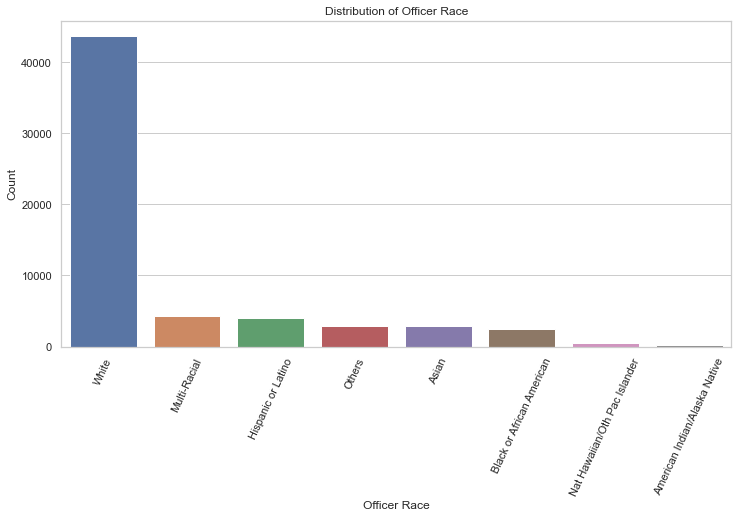

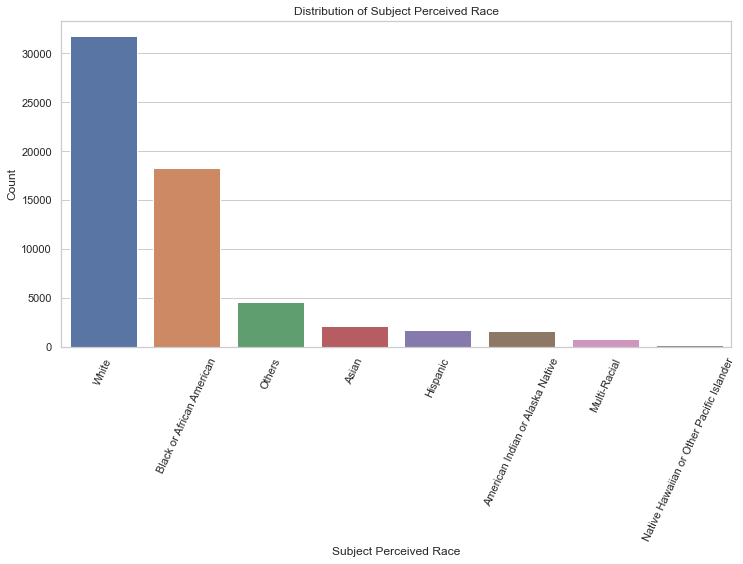

In [1061]:
# Plotting Officer Race
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Officer Race'].value_counts().index, 
            y=df['Officer Race'].value_counts().values)
plt.title('Distribution of Officer Race')
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.xticks(rotation=65)  # Rotate x-axis labels for better readability
plt.show();

# Plotting Subject Perceived Race
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Subject Perceived Race'].value_counts().index, 
            y=df['Subject Perceived Race'].value_counts().values)
plt.title('Distribution of Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count')
plt.xticks(rotation=65)  # Rotate x-axis labels for better readability
plt.show();

Key observations:  

Officer Race  

- White officers make up the vast majority of the police force represented in this data.  
- There's a significant drop-off between the number of White officers and all other racial categories.  
- Officers of color (non-White) are represented in much smaller numbers across various racial categories.  
- Some racial categories have very low representation, particularly American Indian/Alaska Native and Native Hawaiian/Pacific Islander.    

Subject Perceived Race  

- White subjects make up the largest group, followed by Black or African American subjects.  
- There's a significant gap between the number of White subjects and all other racial categories.  
- The "Unknown" category is notably large, suggesting that race was not determined or recorded in many cases.  
- Some racial categories have very low representation, particularly Native Hawaiian/Pacific Islander and Other.  
- The distribution of subject races differs significantly from the distribution of officer races seen in the previous chart.  

### *Stops by Officer*  

Now, let's see what are the first 10 officers that stopped more people.

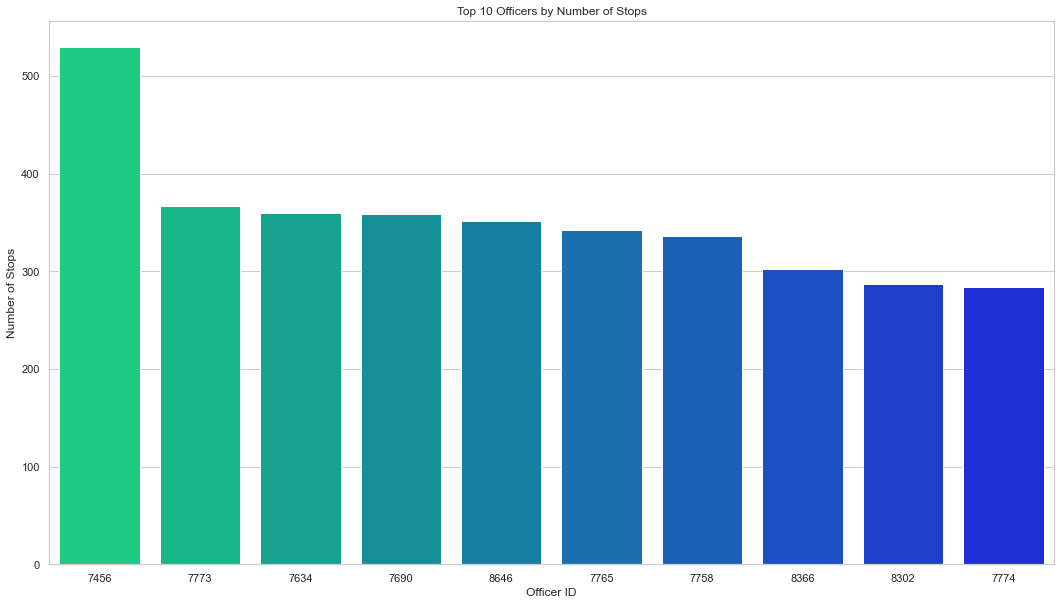

In [1062]:
officer_counts = df["Officer ID"].value_counts()
df_officer_counts = pd.DataFrame(officer_counts).reset_index()

# Rename the columns for clarity
df_officer_counts.columns = ['Officer ID', 'Count']

# Take the top 10 most frequent Officer IDs
df_officer_counts_slice = df_officer_counts[:10]

# Create x and y data for plotting
x_counts = df_officer_counts_slice['Officer ID']  # Officer IDs
y_counts = df_officer_counts_slice['Count']  # Their counts

# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

sns.barplot(x=x_counts, y=y_counts, palette='winter_r')

ax.set_title('Top 10 Officers by Number of Stops')
ax.set_xlabel('Officer ID')
ax.set_ylabel('Number of Stops')

plt.show()

Key observations:

- Officer ID 7456 conducted the most stops, with over 500 stops. This is significantly higher than the other officers in the top 10.  
- The remaining officers (7773, 7634, 7690, 8646, 7765, 7758, 8366, 8302, 7774) have a relatively similar number of stops, all ranging between approximately 300 and 350 stops.  
- The difference in the number of stops between Officer 7456 and the other officers is substantial, indicating that this officer conducted considerably more stops than others in the top 10 list.

### *Stops by Officer Squad* 

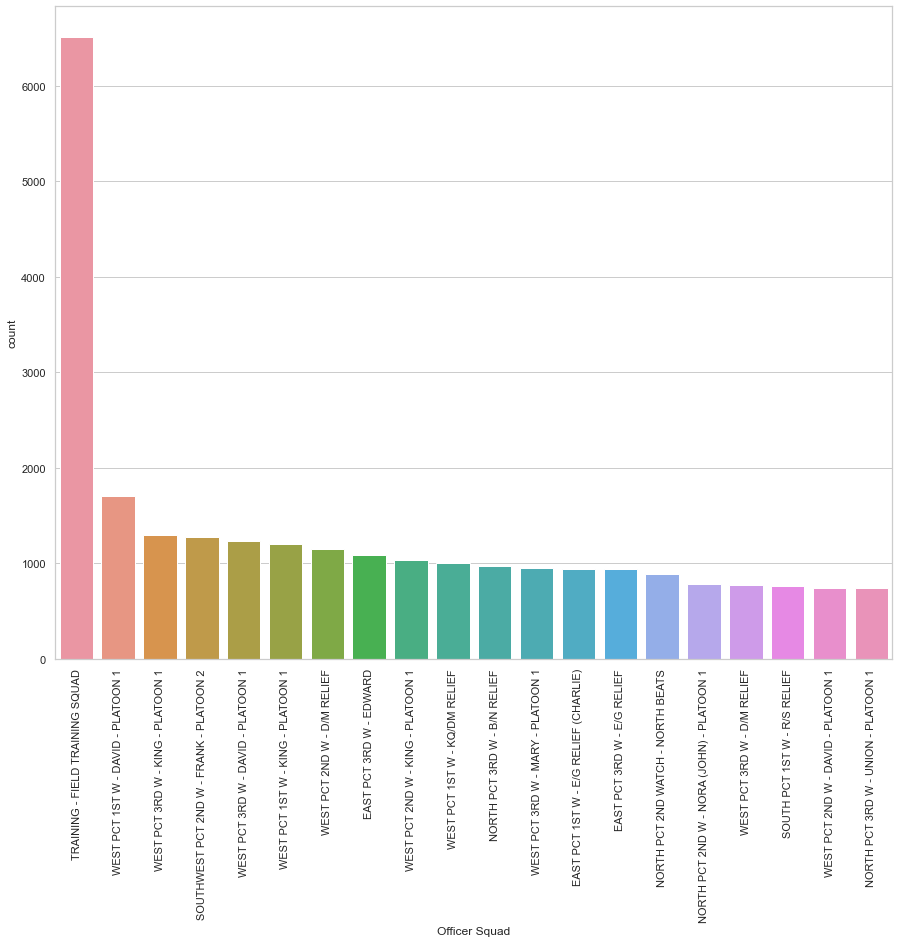

In [1063]:
sns.set_palette('Blues')
fig, ax = plt.subplots()
fig.set_size_inches(15,12)

x_squads = df["Officer Squad"].value_counts().index[:20]
y_squads = df["Officer Squad"].value_counts()[:20]

graph_squads = sns.barplot(x=x_squads, y=y_squads, data=df )

for item in graph_squads.get_xticklabels():
    item.set_rotation(90)

plt.show();

Key observations:  
- The data suggests that different squads have varying levels of involvement in stops, which could reflect their differing roles within the police force.
- The high number of stops associated with training squads may indicate that a significant portion of stops is conducted by officers who are still undergoing training, which could have implications for the overall approach and experience level during stops.

### *Percentage of Stops by Precinct* 

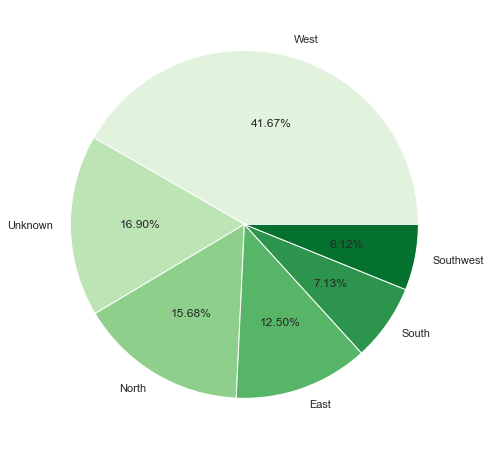

In [1064]:
filter_squad_precinct = (df["Officer Squad"].isin(df["Officer Squad"].value_counts()[:20].index.tolist()))

df_squads_precinct = df[filter_squad_precinct]

#chart config
sns.set_palette('Greens')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

x_squads_precinct = df_squads_precinct['Precinct'].value_counts()
labels_squads_precinct = df_squads_precinct['Precinct'].value_counts().index

graph_squads_precinct = ax.pie(x=x_squads_precinct, labels=labels_squads_precinct, autopct='%1.2f%%')

for item in graph_squads_precinct[0]:
    item.set_edgecolor('white')

plt.show();

Key observations:  

- The "West" region’s high percentage indicates that police activity is heavily concentrated there. This could point to a need for increased police presence due to higher incidences of crime or a larger population base.
- The significant portion labeled "Unknown" suggests that data quality issues exist (data is missing), which could skew the interpretation of results. 
- The smaller percentages in the "South" and "Southwest" regions might indicate lower population density, less crime, or fewer recorded stops in those areas.

### *Occurrence by Sector*

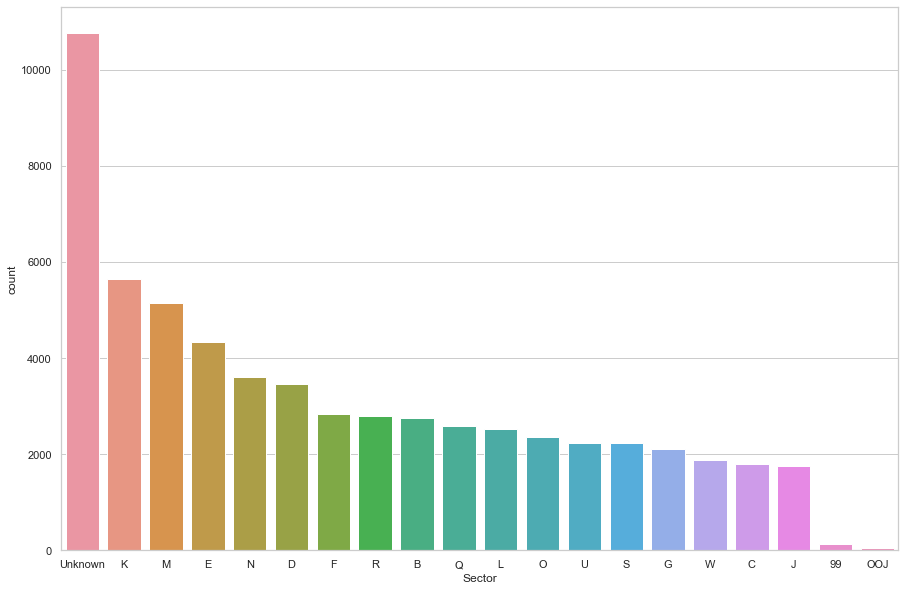

In [1065]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

x_sector = df["Sector"].value_counts().index
y_sector = df["Sector"].value_counts()

graph_sectors = sns.barplot(x=x_sector, y=y_sector, data=df)

plt.show();

Insights:

- The "Unknown" category has a significantly higher count than any other sector, suggesting that a large portion of the data is not classified into a specific sector.
- The other sectors show a more even distribution, with some variation in counts.

### *Top 5 Weapon Type*   

Let's see what are the top 5 Weapon Type in our Dataset. Omitted `Unknown` and `No Weapon` so as to capture all the weapons that were found

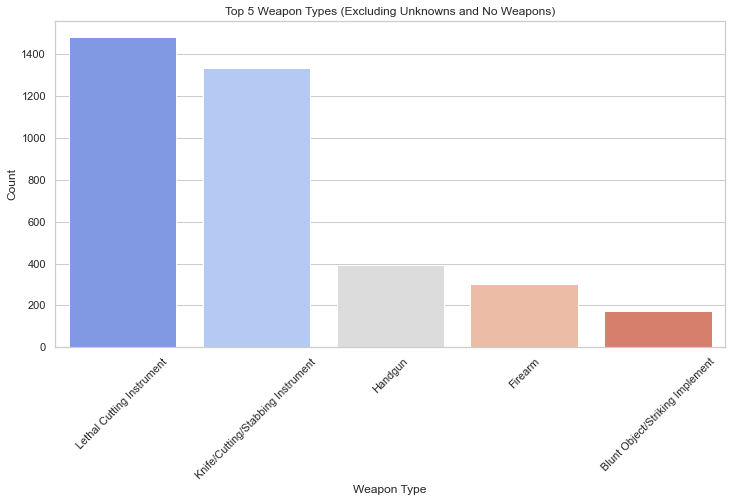

In [1066]:
# Exclude unknown values 
filtered_df = df[df['Weapon Type'].notna() & (df['Weapon Type'] != 'Unknown')]

# Plotting the top 5 weapon types after filtering
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_df['Weapon Type'].value_counts().head(5).index, 
            y=filtered_df['Weapon Type'].value_counts().head(5).values, 
            palette='coolwarm')

plt.title('Top 5 Weapon Types (Excluding Unknowns and No Weapons)')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show();

Key observations:

- Cutting instruments (both large and knife/cutting/stabbing) are by far the most common weapons encountered, making up the majority of the cases shown.  
- Handguns are the third most common, but occur much less frequently than cutting instruments.  
- Blunt objects and firearms are relatively rare compared to the other categories.  
- The chart explicitly excludes unknowns and cases where no weapons were present, focusing only on confirmed weapon types.  
- There's a clear distinction between edged weapons (top two categories) and firearms (categories 4), with edged weapons being much more prevalent.  

### *Top 5 Weapon Types by Top 10 Officers with Highest Number of Stops*

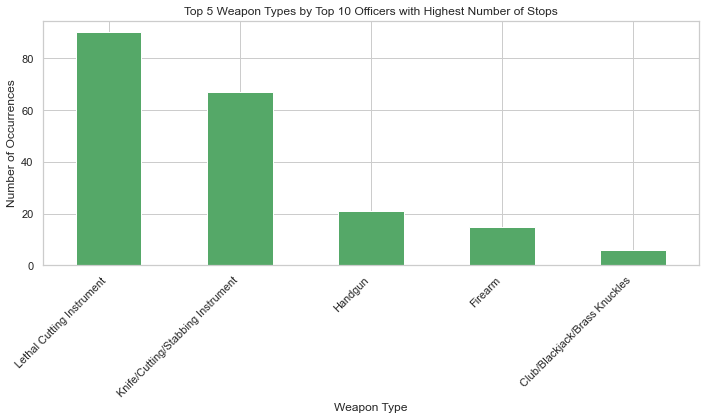

In [1067]:
# Identify the top 10 officers with the highest number of stops
top_10_officers = df['Officer ID'].value_counts().head(10).index

# Filter the dataframe to include only the stops made by these top 10 officers
top_officer_stops = df[df['Officer ID'].isin(top_10_officers)]

# Count the occurrences of each weapon type for these top officers
weapon_counts = top_officer_stops['Weapon Type'].value_counts()

# Extract the top 5 weapon types, excluding "Unknown" values
filtered_weapon_counts = weapon_counts[~weapon_counts.index.isin(['Unknown', 'No Weapon'])]

# Extract the top 5 weapon types after filtering
top_5_weapons_filtered = filtered_weapon_counts.head(5)

# Plot the top 5 weapon types after filtering
plt.figure(figsize=(10, 6))
top_5_weapons_filtered.plot(kind='bar', color='g')
plt.title('Top 5 Weapon Types by Top 10 Officers with Highest Number of Stops')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show();

Key observations:

- Cutting instruments (both large and knife/cutting/stabbing) are by far the most commonly encountered weapons among these top 10 officers, similar to the general trend seen in the previous chart.  
- Handguns are the third most common, but occur much less frequently than cutting instruments.  
- Firearms are relatively rare compared to the other categories.  
- The pattern is consistent with the overall weapon type distribution seen in the previous chart, suggesting that these top officers' experiences are representative of the broader trends.  
- The number of occurrences is much lower than in the previous chart, which is expected as this only represents data from 10 specific officers. 

### *Distribution of Genders of Officers at the Stops*

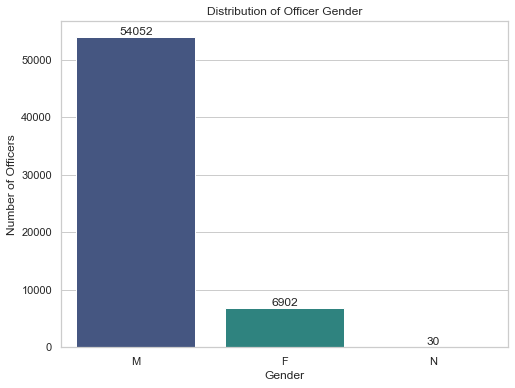

In [1068]:
# Set the style for the plot
sns.set(style="whitegrid")

# Count the occurrences of each gender
gender_counts = df['Officer Gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")

# Annotate the bars with the count values
for i, value in enumerate(gender_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Distribution of Officer Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Officers')

# Show the plot
plt.show();

Key Observations:

The plot shows a strong gender imbalance among officers, with a majority being male. Female officers are fewer, and non-binary or unspecified genders are extremely rare in this dataset. 

Gender Imbalance: The chart highlights a stark gender imbalance within the police force, with male officers being the predominant gender. This could have implications for the dynamics within the force and the broader impact on community interactions and perceptions of law enforcement. 


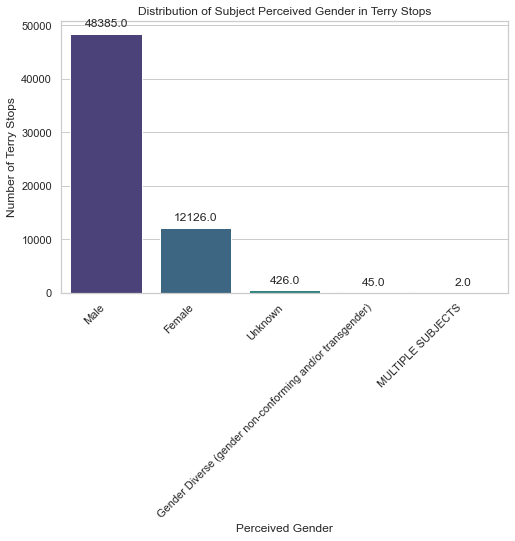

In [1069]:
# Filter data to focus on the 'Subject Perceived Gender' column
gender_data = df['Subject Perceived Gender'].value_counts()

# Plotting the distribution with values on top of the bars
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=gender_data.index, y=gender_data.values, palette="viridis")

# Adding title and labels
plt.title('Distribution of Subject Perceived Gender in Terry Stops')
plt.xlabel('Perceived Gender')
plt.ylabel('Number of Terry Stops')

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show();

The bar chart displays the distribution of Terry Stops based on the **Subject Perceived Gender**. Here are some observations:

- **Predominance of Male Stops**: The majority of Terry Stops involve individuals perceived as male, with a count of 48,385. This significantly outweighs the number of stops for any other perceived gender category.  

- **Female Stops**: The second-highest category is for individuals perceived as female, with 12,126 stops. This is much lower compared to the stops involving males, highlighting a gender disparity in the stops.

Low Counts for Other Categories:

- **Unknown**: There are 426 stops where the subject's perceived gender is unknown. This might include cases where the gender couldn't be determined or was not recorded.  
- **Gender Diverse**: The category "Gender Diverse (gender non-conforming and/or transgender)" has 45 stops, indicating a relatively small number of stops involving individuals perceived as gender non-conforming or transgender.
Multiple Subjects: There are 2 instances where the stop involved multiple subjects, possibly of different genders, leading to a minimal count in this category.  
- **Skewed Distribution**: The chart shows a highly skewed distribution, with the overwhelming majority of stops involving individuals perceived as male, and much fewer involving other gender identities. This could indicate a bias in how or whom law enforcement engages during Terry Stops.

### *Weapon Types Counts Per Subject Perceived Race*

<Figure size 864x576 with 0 Axes>

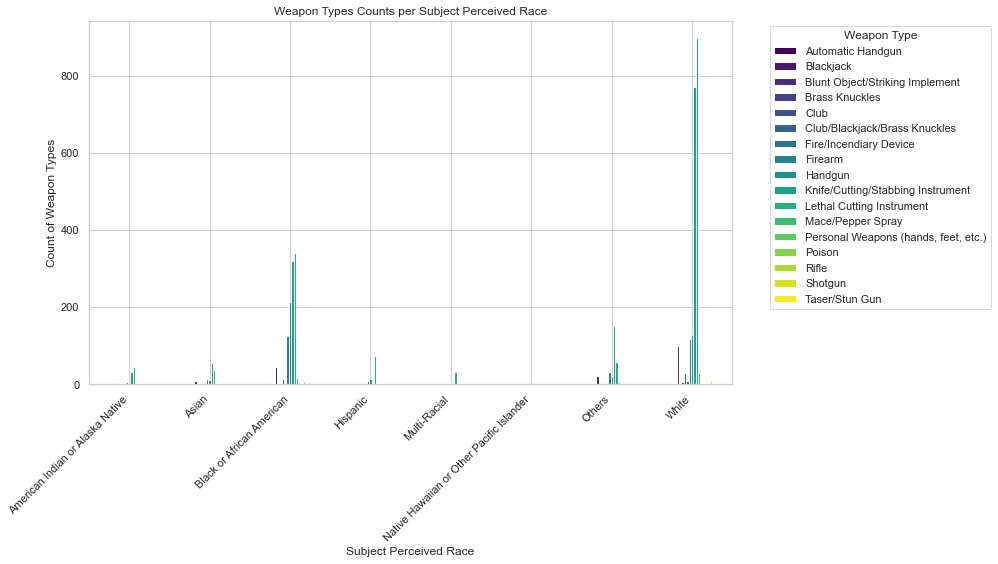

In [1070]:
# Filter out the 'Unknown' and 'None/Not Applicable' weapon types if needed
filtered_df = df[~df['Weapon Type'].isin(['Unknown', 'No Weapon'])]

# Group by 'Subject Perceived Race' and 'Weapon Type' and count occurrences
race_weapon_counts = filtered_df.groupby(['Subject Perceived Race', 'Weapon Type']).size().unstack()

# Plot the grouped bar plot
plt.figure(figsize=(12, 8))
race_weapon_counts.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14, 8))

# Add title and labels
plt.title('Weapon Types Counts per Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count of Weapon Types')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.legend(title='Weapon Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

Observations:

- The most noticeable peaks are within the "White" and "Black or African American" categories, suggesting that these groups have higher counts of weapon types reported.  
- The "White" category has a particularly high count, with a notable peak associated with a specific weapon type.  
- The "Black or African American" category also shows a significant count, but it’s lower than the "White" category.  
- Other racial categories have relatively lower counts across all weapon types.  

### *Arrest Flag and Frisk Flag Comparison*

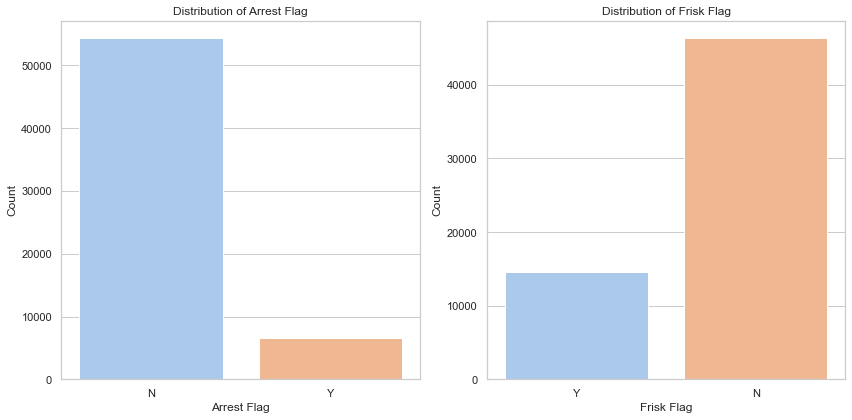

In [1071]:
# Plotting Arrest Flag distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Arrest Flag', data=df, palette='pastel')
plt.title('Distribution of Arrest Flag')
plt.xlabel('Arrest Flag')
plt.ylabel('Count')

# Plotting Frisk Flag distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Frisk Flag', data=df, palette='pastel')
plt.title('Distribution of Frisk Flag')
plt.xlabel('Frisk Flag')
plt.ylabel('Count')

plt.tight_layout()
plt.show();

From the separate plots for the Arrest Flag and Frisk Flag, here are the observations

Arrest Flag Distribution (Left Plot):  
- The majority of incidents did not result in an arrest (denoted by 'N').  
- A smaller number of incidents resulted in an arrest (denoted by 'Y').  

Frisk Flag Distribution (Right Plot):  
- Most incidents did not involve a frisk (denoted by 'N').  
- A substantial number of incidents involved a frisk (denoted by 'Y').

### *Frisk Flag and Arrest Flag Comparison Against Subject Perceived Race*

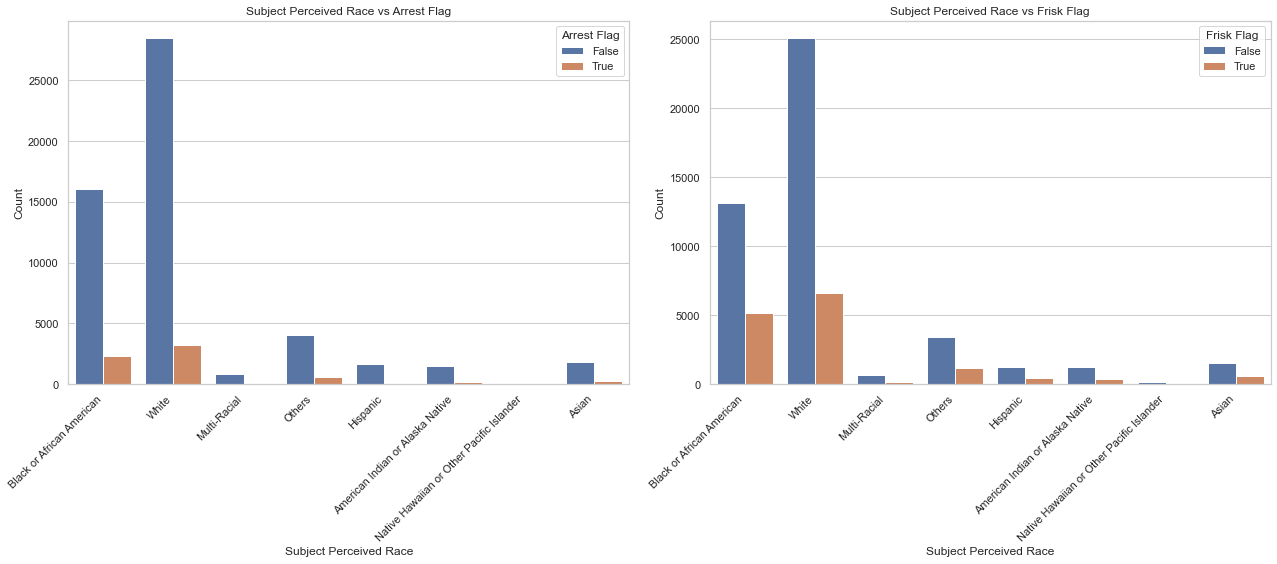

In [1072]:
# Filter the relevant columns
df_filtered = df[['Subject Perceived Race', 'Arrest Flag', 'Frisk Flag']]

# Convert the 'Arrest Flag' and 'Frisk Flag' to boolean for better plotting
df_filtered['Arrest Flag'] = df_filtered['Arrest Flag'].map({'Y': True, 'N': False})
df_filtered['Frisk Flag'] = df_filtered['Frisk Flag'].map({'Y': True, 'N': False})

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Arrest Flag
sns.countplot(data=df_filtered, x='Subject Perceived Race', hue='Arrest Flag', ax=axes[0])
axes[0].set_title('Subject Perceived Race vs Arrest Flag')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Subject Perceived Race')

# Rotate and align the x-axis labels
for label in axes[0].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

# Plot for Frisk Flag
sns.countplot(data=df_filtered, x='Subject Perceived Race', hue='Frisk Flag', ax=axes[1])
axes[1].set_title('Subject Perceived Race vs Frisk Flag')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Subject Perceived Race')
axes[1].tick_params(axis='x', rotation=45)

# Rotate and align the x-axis labels
for label in axes[1].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

plt.tight_layout()
plt.show();

1. Subject Perceived Race vs Arrest Flag (Left Plot):

- White: This group shows the highest number of stops overall, with a significant majority not resulting in an arrest (indicated by the taller blue bar for False compared to the orange bar for True).
- Black or African American: The second highest number of stops occurred in this group. Similar to the white group, most stops did not result in an arrest, but the proportion of arrests to non-arrests seems higher compared to the white group.
- Other Races (e.g., Hispanic, Asian): These groups have significantly fewer stops, and similarly, the majority do not result in arrests.

2. Subject Perceived Race vs Frisk Flag (Right Plot):
- White: The pattern is similar to the arrest data, where most stops did not result in a frisk, though the number of frisks (True) is higher here than the number of arrests (True).
- Black or African American: This group also shows a significant number of frisks, with a relatively higher proportion of stops leading to frisks compared to other racial groups.
- Other Races: Similar trends are observed where the majority of stops do not result in frisks, and the overall number of stops is low compared to the white and Black or African American groups.

**General Observations**:
- **Disparity in Stops**: The data suggests that there are far more stops involving individuals perceived to be White and Black or African American compared to other racial groups.
- **Disparity in Arrests and Frisks**: While the majority of stops do not result in arrests or frisks for all groups, the proportion of arrests and frisks is notably higher among stops involving Black or African American individuals compared to White individuals.

### *Top 10 Officer YOB with Highest Stop Counts*

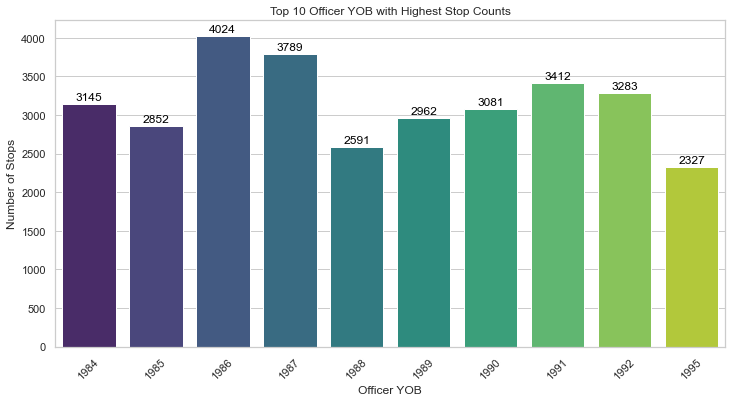

In [1073]:
# Count the number of stops per Officer YOB
officer_yob_counts = df['Officer YOB'].value_counts().head(10).sort_index()

# Create a bar plot for the top 10 Officer YOB with the highest stop counts
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=officer_yob_counts.index, 
                      y=officer_yob_counts.values, 
                      palette='viridis')

# Annotate the bars with the respective counts
for index, value in enumerate(officer_yob_counts.values):
    barplot.text(index, value + 50, f'{value}', ha='center', color='black')

plt.title('Top 10 Officer YOB with Highest Stop Counts')
plt.xlabel('Officer YOB')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show();

The plot above shows the distribution of the top 10 officer years of birth (YOB) with the highest number of stops. Here are some key observations:
 
1. Highest Stop Counts:  
    - Officers born in 1986 have the highest number of stops, with a count of 4,024. This indicates that officers born in this year are the most frequently involved in stops compared to other years of birth.  
    - The second-highest number of stops is for officers born in 1987, with 3,789 stops.  

2. Range of Stop Counts:  
    - The number of stops for the top 10 YOBs ranges from 2,327 (for 1995) to 4,024 (for 1986). This indicates a fairly significant variation in stop activity among officers born in different years within this top group.  
 
3. General Trend:  
    - The data doesn't show a clear linear trend across years, but there are clusters of high activity. For example, the years 1986, 1987, and 1991 have relatively high counts, while 1985 and 1995 have lower counts within this top 10 group.  

**Potential Insights**:  
    - The clustering of higher stop counts in certain years could be related to factors such as the number of officers hired during those years, experience levels, or specific policies in place during their tenure. Officers born in these years might also be at a particular stage in their careers where they are more active in making stops.  
    - The relatively lower stop counts for officers born in 1995 could indicate that these officers are newer to the force and might not have had as many opportunities to make stops, or they might be in different roles.

## **Feature Engineering**

In [1116]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [1074]:
# Columns to retain for X (features) and y (target)
relevant_columns = [
    'Stop Resolution', 'Weapon Type', 'Officer Gender', 
    'Officer Race', 'Officer YOB', 'Subject Perceived Race', 
    'Subject Perceived Gender', 'Reported Date', 'Reported Time', 'Frisk Flag', 
    'Arrest Flag'  # This is for y
]

# Keep only the relevant columns
terry_stops_df = df[relevant_columns]

terry_stops_df.shape

(60984, 11)

In [1075]:
terry_stops_df.head()

,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Officer YOB,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Frisk Flag,Arrest Flag
0,Offense Report,Unknown,M,Multi-Racial,1973,Black or African American,Male,2017-01-15,08:03:00,Y,N
1,Field Contact,Unknown,M,White,1969,Black or African American,Male,2019-07-26,06:38:41,Y,N
2,Field Contact,Unknown,M,Asian,1964,White,Female,2020-06-13,01:27:52,N,N
3,Arrest,Unknown,M,Black or African American,1967,White,Male,2017-04-29,09:53:00,Y,N
4,Field Contact,Unknown,M,White,1977,Multi-Racial,Male,2016-05-10,21:57:00,N,N


In [1076]:
categorical = [var for var in terry_stops_df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 10 categorical variables

The categorical variables are : ['Stop Resolution', 'Weapon Type', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender', 'Reported Date', 'Reported Time', 'Frisk Flag', 'Arrest Flag']


Explanation of Categorical Variables:

- Nominal Variables: These variables represent categories without any inherent order. Examples include "Stop Resolution," "Officer Gender," "Officer Race," "Subject Perceived Race," and "Subject Perceived Gender".  
- Binary Variables: Variables like "Frisk Flag" and "Arrest Flag" are binary, indicating two possible outcomes (e.g., "Yes" or "No").

### *Frequency Count of Categorical Variables*

Now, I will check the frequency counts of categorical variables.

In [1077]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Stop Resolution
Field Contact               29528
Offense Report              15726
Arrest                      14784
Referred for Prosecution      728
Citation / Infraction         218
Name: count, dtype: int64
Weapon Type
Unknown                                 57114
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument        1332
Handgun                                   394
Firearm                                   300
Blunt Object/Striking Implement           175
Mace/Pepper Spray                          56
Club/Blackjack/Brass Knuckles              49
Taser/Stun Gun                             18
No Weapon                                  18
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Poison                                  

In [1078]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float64(len(df)))

Stop Resolution
Field Contact               0.484193
Offense Report              0.257871
Arrest                      0.242424
Referred for Prosecution    0.011938
Citation / Infraction       0.003575
Name: count, dtype: float64
Weapon Type
Unknown                                 0.936541
Lethal Cutting Instrument               0.024301
Knife/Cutting/Stabbing Instrument       0.021842
Handgun                                 0.006461
Firearm                                 0.004919
Blunt Object/Striking Implement         0.002870
Mace/Pepper Spray                       0.000918
Club/Blackjack/Brass Knuckles           0.000803
Taser/Stun Gun                          0.000295
No Weapon                               0.000295
Fire/Incendiary Device                  0.000213
Rifle                                   0.000180
Club                                    0.000148
Shotgun                                 0.000098
Automatic Handgun                       0.000033
Personal Weapons (hands,

### Number of labels: cardinality

The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [1079]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Stop Resolution  contains  5  labels
Weapon Type  contains  19  labels
Officer Gender  contains  3  labels
Officer Race  contains  8  labels
Subject Perceived Race  contains  8  labels
Subject Perceived Gender  contains  5  labels
Reported Date  contains  3447  labels
Reported Time  contains  23661  labels
Frisk Flag  contains  2  labels
Arrest Flag  contains  2  labels


We can see that there is a `Reported Date` variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables.

In [1080]:
terry_stops_df['Reported Date'].dtypes

dtype('O')

We can see that the data type of `Reported Date` variable is object. I will parse the date currently coded as object into datetime format.

In [1081]:
# parse the dates, currently coded as strings, into datetime format

terry_stops_df['Reported Date'] = pd.to_datetime(terry_stops_df['Reported Date'])

In [1082]:
# extract year from date

terry_stops_df['Reported Year'] = terry_stops_df['Reported Date'].dt.year

terry_stops_df['Reported Year'].head()

0    2017
1    2019
2    2020
3    2017
4    2016
Name: Reported Year, dtype: int32

In [1083]:
# extract month from date

terry_stops_df['Reported Month'] = terry_stops_df['Reported Date'].dt.month

terry_stops_df['Reported Month'].head()

0    1
1    7
2    6
3    4
4    5
Name: Reported Month, dtype: int32

In [1084]:
# extract day from date

terry_stops_df['Reported Day'] = terry_stops_df['Reported Date'].dt.day

terry_stops_df['Reported Day'].head()

0    15
1    26
2    13
3    29
4    10
Name: Reported Day, dtype: int32

In [1085]:
# again view the summary of dataset

terry_stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60984 entries, 0 to 60983
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Stop Resolution           60984 non-null  object        
 1   Weapon Type               60984 non-null  object        
 2   Officer Gender            60984 non-null  object        
 3   Officer Race              60984 non-null  object        
 4   Officer YOB               60984 non-null  int64         
 5   Subject Perceived Race    60984 non-null  object        
 6   Subject Perceived Gender  60984 non-null  object        
 7   Reported Date             60984 non-null  datetime64[ns]
 8   Reported Time             60984 non-null  object        
 9   Frisk Flag                60984 non-null  object        
 10  Arrest Flag               60984 non-null  object        
 11  Reported Year             60984 non-null  int32         
 12  Reported Month    

We can see that there are three additional columns created from `Reported Date` variable. Now, I will drop the original `Reported Date` variable from the dataset.

In [1086]:
# drop the original Date variable

terry_stops_df.drop('Reported Date', axis=1, inplace = True)

In [1087]:
terry_stops_df["Reported Time"].dtypes

dtype('O')

In [1088]:
terry_stops_df["Reported Time"].head()

0    08:03:00
1    06:38:41
2    01:27:52
3    09:53:00
4    21:57:00
Name: Reported Time, dtype: object

As we can see `Reported Time` is an variable is object. I will parse the time currently coded as object into datetime format.

In [1089]:
# Convert the 'Reported Time' column to datetime objects
terry_stops_df['Reported Time'] = pd.to_datetime(terry_stops_df['Reported Time'], format='%H:%M:%S')

# Create new columns for hour, minute, and second
terry_stops_df['Hour'] = terry_stops_df['Reported Time'].dt.hour
terry_stops_df['Minute'] = terry_stops_df['Reported Time'].dt.minute
terry_stops_df['Second'] = terry_stops_df['Reported Time'].dt.second

terry_stops_df.drop('Reported Time', axis=1, inplace = True)

In [1090]:
# preview the dataset again

terry_stops_df.head()

,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Officer YOB,Subject Perceived Race,Subject Perceived Gender,Frisk Flag,Arrest Flag,Reported Year,Reported Month,Reported Day,Hour,Minute,Second
0,Offense Report,Unknown,M,Multi-Racial,1973,Black or African American,Male,Y,N,2017,1,15,8,3,0
1,Field Contact,Unknown,M,White,1969,Black or African American,Male,Y,N,2019,7,26,6,38,41
2,Field Contact,Unknown,M,Asian,1964,White,Female,N,N,2020,6,13,1,27,52
3,Arrest,Unknown,M,Black or African American,1967,White,Male,Y,N,2017,4,29,9,53,0
4,Field Contact,Unknown,M,White,1977,Multi-Racial,Male,N,N,2016,5,10,21,57,0


In [1091]:
terry_stops_df.shape

(60984, 15)

Now, we can see that the `Reported Date` variable has been removed from the dataset.

### ***Explore Categorical Variables***

Now, I will explore the categorical variables

In [1092]:
terry_stops_df["Reported Year"].dtype

dtype('int32')

In [1093]:
terry_stops_df.columns

Index(['Stop Resolution', 'Weapon Type', 'Officer Gender', 'Officer Race',
       'Officer YOB', 'Subject Perceived Race', 'Subject Perceived Gender',
       'Frisk Flag', 'Arrest Flag', 'Reported Year', 'Reported Month',
       'Reported Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [1094]:
categoricals = [var for var in terry_stops_df.columns if terry_stops_df[var].dtype == 'O']
terry_stops_df[categoricals]

,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Frisk Flag,Arrest Flag
0,Offense Report,Unknown,M,Multi-Racial,Black or African American,Male,Y,N
1,Field Contact,Unknown,M,White,Black or African American,Male,Y,N
2,Field Contact,Unknown,M,Asian,White,Female,N,N
3,Arrest,Unknown,M,Black or African American,White,Male,Y,N
4,Field Contact,Unknown,M,White,Multi-Racial,Male,N,N
...,...,...,...,...,...,...,...,...
60979,Field Contact,Unknown,M,White,Black or African American,Male,N,N
60980,Field Contact,Unknown,F,Multi-Racial,Asian,Male,N,N
60981,Field Contact,Unknown,M,Others,Black or African American,Male,N,N
60982,Arrest,Unknown,M,Others,White,Male,N,Y


#### One Hot Encode the Categorical Variables

In [1095]:
# Instantiate the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' can be used to avoid multicollinearity

# Fit and transform the data
ohe = encoder.fit_transform(terry_stops_df[categoricals])

# Convert to DataFrame and add column names
ohe_df = pd.DataFrame(ohe, columns=encoder.get_feature_names_out(categoricals))

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([terry_stops_df.drop(columns=categoricals), ohe_df], axis=1)

# View the result
df_encoded.head()

,Officer YOB,Reported Year,Reported Month,Reported Day,Hour,Minute,Second,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,...,Subject Perceived Race_Multi-Racial,Subject Perceived Race_Native Hawaiian or Other Pacific Islander,Subject Perceived Race_Others,Subject Perceived Race_White,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_MULTIPLE SUBJECTS,Subject Perceived Gender_Male,Subject Perceived Gender_Unknown,Frisk Flag_Y,Arrest Flag_Y
0,1973,2017,1,15,8,3,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1969,2019,7,26,6,38,41,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1964,2020,6,13,1,27,52,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1967,2017,4,29,9,53,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1977,2016,5,10,21,57,0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### ***Explore Numerical Variables***

Now, I will explore the Numerical variables

In [1096]:
# find numerical variables

numerical = [var for var in terry_stops_df.columns if terry_stops_df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['Officer YOB', 'Reported Year', 'Reported Month', 'Reported Day', 'Hour', 'Minute', 'Second']


On closer inspection, we can see that the `Officer YOB`, `Reported Year`, `Reported Month` and `Reported Day` columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables. 

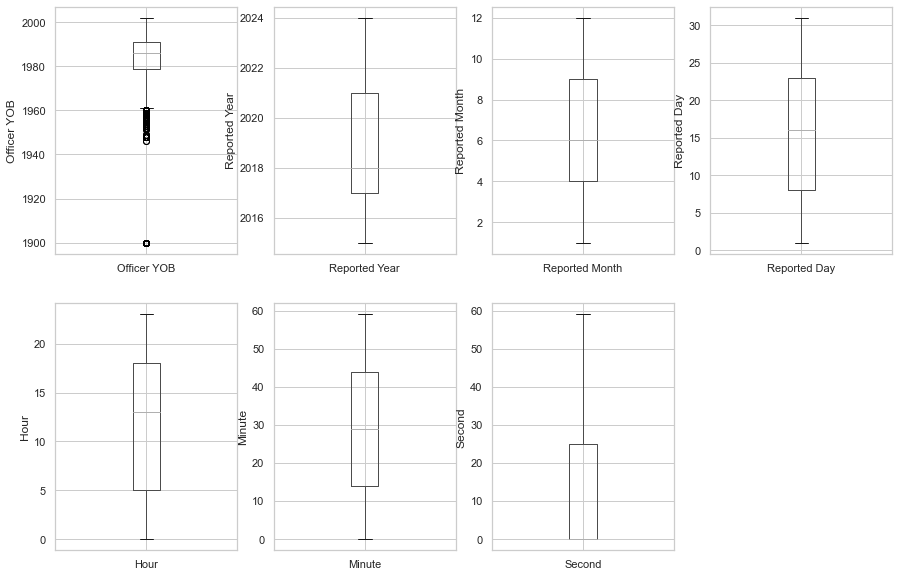

In [1097]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 4, 1)
fig = terry_stops_df.boxplot(column='Officer YOB')
fig.set_title('')
fig.set_ylabel('Officer YOB')


plt.subplot(2, 4, 2)
fig = terry_stops_df.boxplot(column='Reported Year')
fig.set_title('')
fig.set_ylabel('Reported Year')


plt.subplot(2, 4, 3)
fig = terry_stops_df.boxplot(column='Reported Month')
fig.set_title('')
fig.set_ylabel('Reported Month')


plt.subplot(2, 4, 4)
fig = terry_stops_df.boxplot(column='Reported Day')
fig.set_title('')
fig.set_ylabel('Reported Day')

plt.subplot(2, 4, 5)
fig = terry_stops_df.boxplot(column='Hour')
fig.set_title('')
fig.set_ylabel('Hour')

plt.subplot(2, 4, 6)
fig = terry_stops_df.boxplot(column='Minute')
fig.set_title('')
fig.set_ylabel('Minute')

plt.subplot(2, 4, 7)
fig = terry_stops_df.boxplot(column='Second')
fig.set_title('')
fig.set_ylabel('Second');

The above boxplots confirm that there are lot of outliers in Officer YOB variable.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find IQR (Interquantile range).

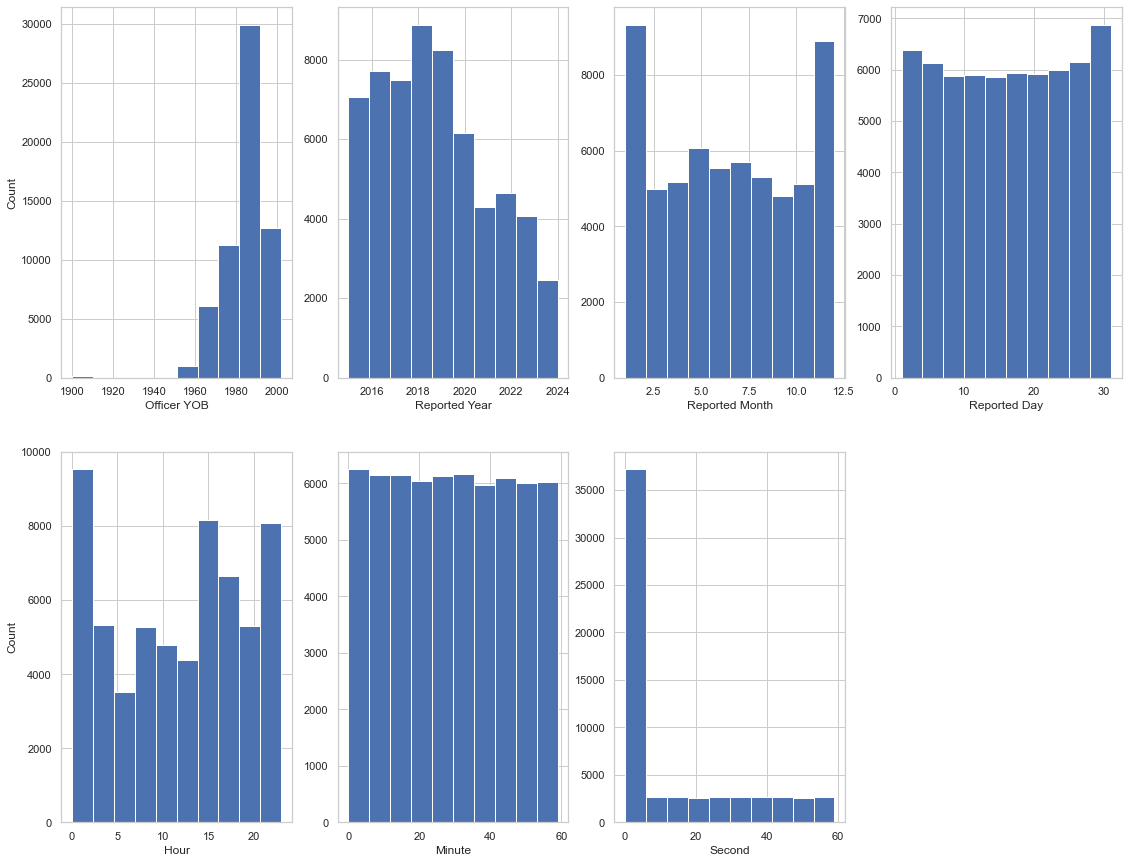

In [1098]:
# plot histogram to check distribution

plt.figure(figsize=(19,15))


plt.subplot(2, 4, 1)
fig = terry_stops_df["Officer YOB"].hist(bins=10)
fig.set_xlabel('Officer YOB')
fig.set_ylabel('Count')


plt.subplot(2, 4, 2)
fig = terry_stops_df["Reported Year"].hist(bins=10)
fig.set_xlabel('Reported Year')


plt.subplot(2, 4, 3)
fig = terry_stops_df["Reported Month"].hist(bins=10)
fig.set_xlabel('Reported Month')


plt.subplot(2, 4, 4)
fig = terry_stops_df["Reported Day"].hist(bins=10)
fig.set_xlabel('Reported Day')


plt.subplot(2, 4, 5)
fig = terry_stops_df["Hour"].hist(bins=10)
fig.set_xlabel('Hour')
fig.set_ylabel('Count')


plt.subplot(2, 4, 6)
fig = terry_stops_df["Minute"].hist(bins=10)
fig.set_xlabel('Minute')


plt.subplot(2, 4, 7)
fig = terry_stops_df["Second"].hist(bins=10)
fig.set_xlabel('Second');

We can see that one variable is skewed. So, I will use interquantile range to find outliers.

In [1099]:
IQR = terry_stops_df["Officer YOB"].quantile(0.75) - terry_stops_df["Officer YOB"].quantile(0.25)
Lower_fence = terry_stops_df["Officer YOB"].quantile(0.25) - (IQR * 3)
Upper_fence = terry_stops_df["Officer YOB"].quantile(0.75) + (IQR * 3)
print('Officer YOB outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Officer YOB outliers are values < 1943.0 or > 2027.0


### ***Declare feature vector and target variable***

In [1100]:
X = df_encoded.drop(['Arrest Flag_Y'], axis=1)

y = df_encoded['Arrest Flag_Y']

### ***Split data into separate training and test set***

In [1101]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [1102]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((42688, 50), (18296, 50))

In [1103]:
X_train.head()

,Officer YOB,Reported Year,Reported Month,Reported Day,Hour,Minute,Second,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,...,Subject Perceived Race_Hispanic,Subject Perceived Race_Multi-Racial,Subject Perceived Race_Native Hawaiian or Other Pacific Islander,Subject Perceived Race_Others,Subject Perceived Race_White,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_MULTIPLE SUBJECTS,Subject Perceived Gender_Male,Subject Perceived Gender_Unknown,Frisk Flag_Y
15232,1994,2022,11,18,15,47,39,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
59278,1987,2015,8,19,2,4,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
38470,1972,2021,9,1,18,29,27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
54112,1993,2024,3,17,21,44,51,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
505,1977,2015,10,5,9,48,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1104]:
X_test.head()

,Officer YOB,Reported Year,Reported Month,Reported Day,Hour,Minute,Second,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,...,Subject Perceived Race_Hispanic,Subject Perceived Race_Multi-Racial,Subject Perceived Race_Native Hawaiian or Other Pacific Islander,Subject Perceived Race_Others,Subject Perceived Race_White,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_MULTIPLE SUBJECTS,Subject Perceived Gender_Male,Subject Perceived Gender_Unknown,Frisk Flag_Y
9427,1980,2016,1,23,1,56,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6055,1994,2019,11,29,3,48,37,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
38075,1991,2015,7,18,4,24,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
45423,1993,2020,7,6,7,14,52,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7266,1982,2019,3,27,19,3,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Feature Scaling**

In [1105]:
X_train.describe()

,Officer YOB,Reported Year,Reported Month,Reported Day,Hour,Minute,Second,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,...,Subject Perceived Race_Hispanic,Subject Perceived Race_Multi-Racial,Subject Perceived Race_Native Hawaiian or Other Pacific Islander,Subject Perceived Race_Others,Subject Perceived Race_White,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_MULTIPLE SUBJECTS,Subject Perceived Gender_Male,Subject Perceived Gender_Unknown,Frisk Flag_Y
count,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,...,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000
mean,1984.066108,2018.698510,6.437453,15.645919,11.750515,29.349255,12.758269,0.003561,0.483860,0.258738,...,0.027830,0.013095,0.002694,0.075501,0.520006,0.000726,0.000047,0.790995,0.007004,0.238147
std,9.540507,2.584083,3.334173,8.857793,7.237215,17.373178,18.517869,0.059566,0.499745,0.437946,...,0.164487,0.113683,0.051834,0.264202,0.499605,0.026939,0.006845,0.406603,0.083399,0.425954
min,1900.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1979.000000,2017.000000,4.000000,8.000000,5.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1986.000000,2018.000000,6.000000,16.000000,13.000000,29.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1991.000000,2021.000000,9.000000,23.000000,18.000000,44.000000,25.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2002.000000,2024.000000,12.000000,31.000000,23.000000,59.000000,59.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1106]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [1107]:
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
    )

In [1108]:
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
    )

In [1109]:
X_train.describe()

,Officer YOB,Reported Year,Reported Month,Reported Day,Hour,Minute,Second,Stop Resolution_Citation / Infraction,Stop Resolution_Field Contact,Stop Resolution_Offense Report,...,Subject Perceived Race_Hispanic,Subject Perceived Race_Multi-Racial,Subject Perceived Race_Native Hawaiian or Other Pacific Islander,Subject Perceived Race_Others,Subject Perceived Race_White,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_MULTIPLE SUBJECTS,Subject Perceived Gender_Male,Subject Perceived Gender_Unknown,Frisk Flag_Y
count,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,...,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000,42688.000000
mean,0.824178,0.410946,0.494314,0.488197,0.510892,0.497445,0.216242,0.003561,0.483860,0.258738,...,0.027830,0.013095,0.002694,0.075501,0.520006,0.000726,0.000047,0.790995,0.007004,0.238147
std,0.093534,0.287120,0.303107,0.295260,0.314662,0.294461,0.313862,0.059566,0.499745,0.437946,...,0.164487,0.113683,0.051834,0.264202,0.499605,0.026939,0.006845,0.406603,0.083399,0.425954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.774510,0.222222,0.272727,0.233333,0.217391,0.237288,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.843137,0.333333,0.454545,0.500000,0.565217,0.491525,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.892157,0.666667,0.727273,0.733333,0.782609,0.745763,0.423729,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Model Training**

In [1110]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### *Predict Model*

In [1111]:
y_pred_test = logreg.predict(X_test)

### *Checking Accuracy Score*

In [1112]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9975


Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [1113]:
y_pred_train = logreg.predict(X_train)

In [1114]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9971


### Check for overfitting and underfitting

In [1115]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9971
Test set score: 0.9975


In [1117]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [1118]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9996
Test set score: 0.9995


In [1119]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [1120]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.9731
Test set score: 0.9755


### Compare model accuracy with null accuracy

In [1121]:
# check class distribution in test set

y_test.value_counts()

Arrest Flag_Y
0.0    16274
1.0     2022
Name: count, dtype: int64

We can see that the occurences of most frequent class is 16274. So, we can calculate null accuracy by dividing 16274 by total number of occurences.

In [1122]:
# check null accuracy score

null_accuracy = (16274/(16274 + 2022))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8895


## **Confusion matrix**

In [1123]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[16270     4]
 [   42  1980]]

True Positives(TP) =  16270

True Negatives(TN) =  1980

False Positives(FP) =  4

False Negatives(FN) =  42


The confusion matrix shows `16270 + 1980 = 18250 correct predictions` and `4 + 42 = 46 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 16270


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 1980


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 4 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 42 `(Type II error)`

<Axes: >

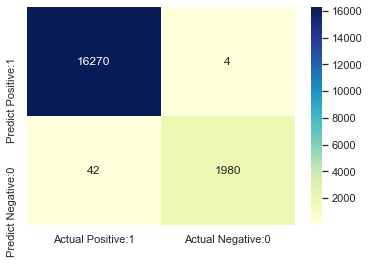

In [1124]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## **Classification Metrices**

In [1125]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16274
         1.0       1.00      0.98      0.99      2022

    accuracy                           1.00     18296
   macro avg       1.00      0.99      0.99     18296
weighted avg       1.00      1.00      1.00     18296



## Classification accuracy

In [1126]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [1127]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9975


## Classification error

In [1128]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0025


## Precision

In [1129]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9998


## Recall

In [1130]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9974


## True Positive Rate

In [1131]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9974


## False Positivity Rate

In [1132]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0020


## Specificity

In [1133]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9980


## f1-Score

In [1135]:
f1_score = 2 * ((precision * recall)/ (precision + recall))

f1_score

0.9985883508255079